#Modelling

REFERENCIAS:

https://www.kaggle.com/kernels/scriptcontent/1097183/

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import _pickle as pkl
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# train = pd.read_csv('/content/gdrive/My Drive/colab_data/cartola_2014.csv')
# test = pd.read_csv('/content/gdrive/My Drive/colab_data/cartola_test.csv')
# testId = test.atleta_id

# print(train.shape)
# print(test.shape)

In [3]:
train = pd.read_csv('data/cartola_2014.csv')
test = pd.read_csv('data/cartola_test.csv')
testId = pd.read_csv('data/cartola_test.csv')

print(train.shape)
print(test.shape)

(29184, 34)
(1610, 33)


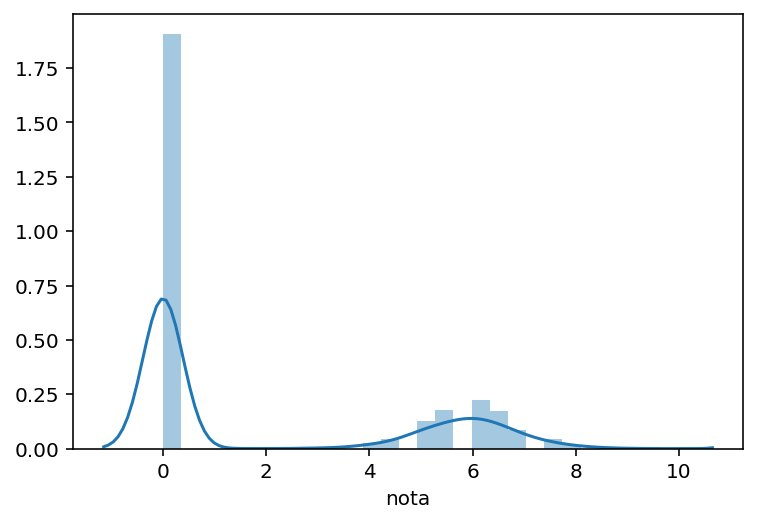

In [4]:
sns.distplot(train.nota)

In [5]:
all_data = pd.concat((train.loc[:,'atleta_id':'GS'],
                      test.loc[:,'atleta_id':'GS']))

all_data.drop(['nota'], axis=1, inplace=True)

all_data.head()

C:\Users\PICHAU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,A,CA,CV,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,PE,PP,RB,SG,atleta_id,clube_id,jogos_num,mando,media_num,participou,partida_id,pontos_num,posicao_id,preco_num,rodada,substituido,tempo_jogado,titular,variacao_num
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,37958,262.0,1,1,8.0,1,179872.0,8.0,1.0,19.69,1,0,1.0,1.0,1.69
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68873,262.0,0,1,0.0,0,179872.0,0.0,1.0,4.00,1,0,0.0,0.0,0.00
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,1,37701,262.0,1,1,0.4,1,179872.0,0.4,2.0,16.97,1,0,1.0,1.0,-5.03
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71602,262.0,0,1,0.0,0,179872.0,0.0,2.0,3.00,1,0,0.0,0.0,0.00
4,0,0,0,0,0,1,1,0,2,0,0,0,0,1,1,0,2,1,37684,262.0,1,1,9.1,1,179872.0,9.1,3.0,10.68,1,0,1.0,1.0,5.68


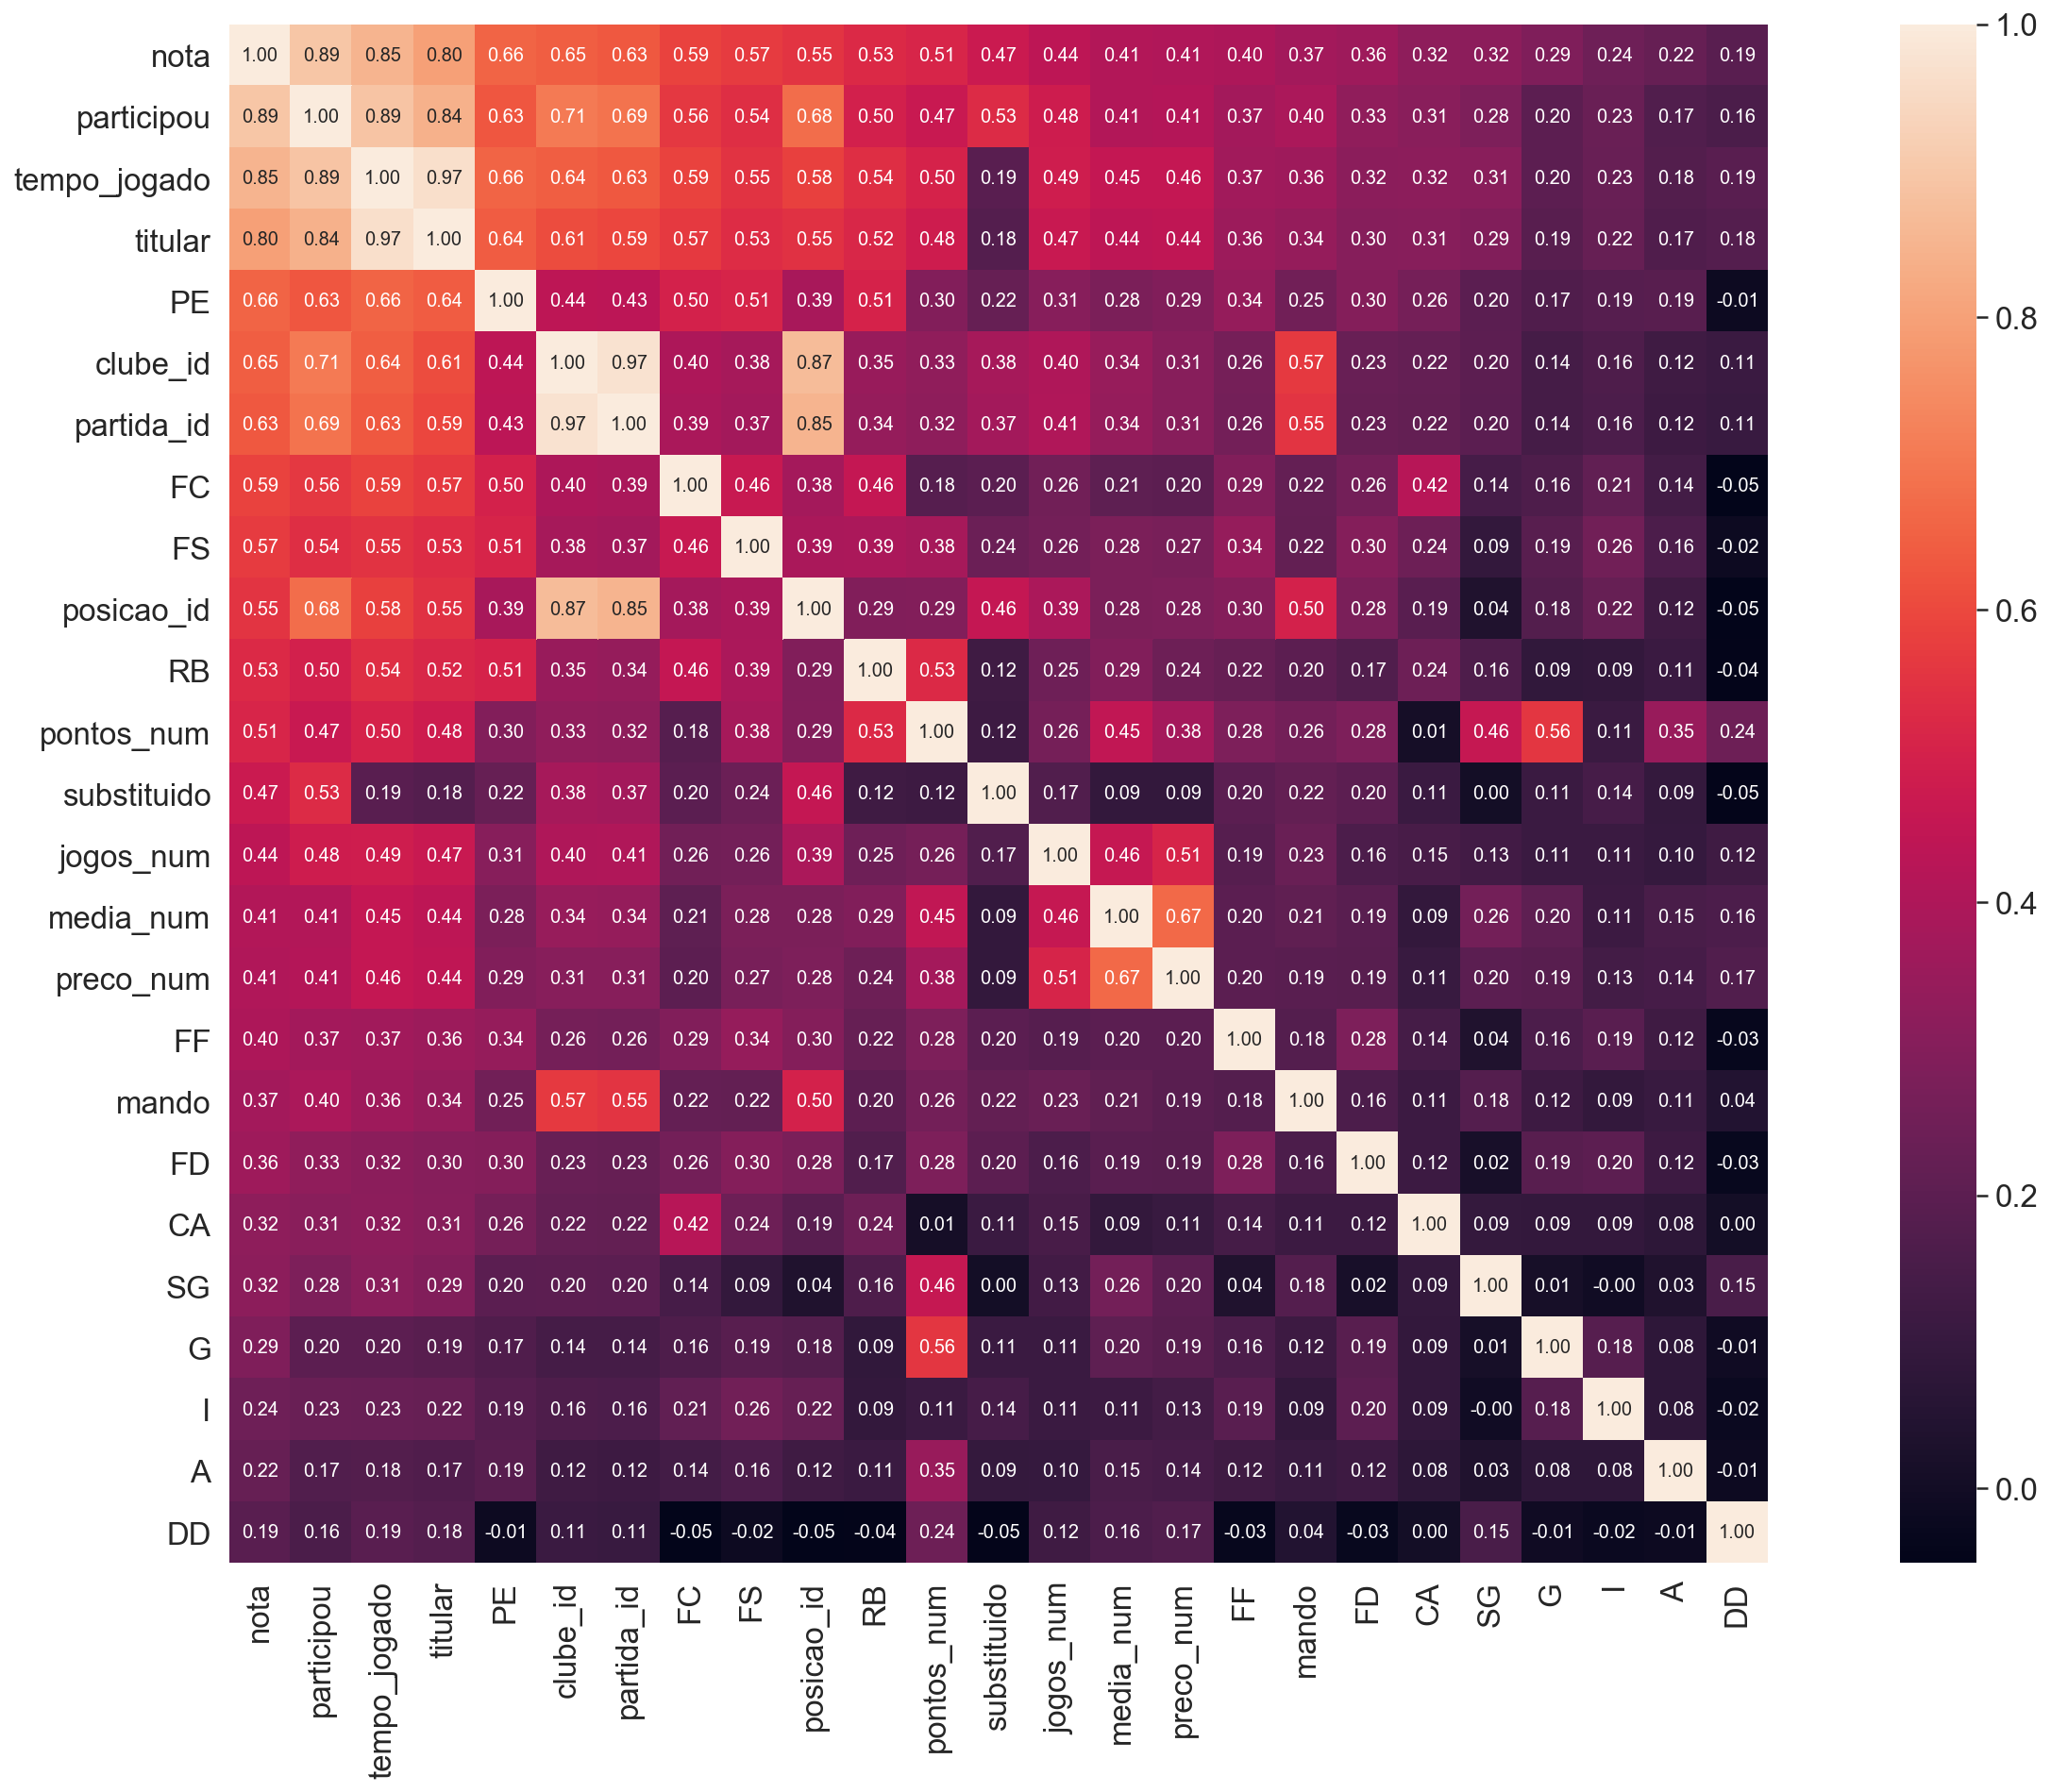

Index(['nota', 'participou', 'tempo_jogado', 'titular', 'PE', 'clube_id',
       'partida_id', 'FC', 'FS', 'posicao_id', 'RB', 'pontos_num',
       'substituido', 'jogos_num', 'media_num', 'preco_num', 'FF', 'mando',
       'FD', 'CA', 'SG', 'G', 'I', 'A', 'DD'],
      dtype='object')


In [6]:
import seaborn as sns


plt.figure(figsize = (25,15))
corrmat = train.corr()
k = 25 #number of variables for heatmap
cols = corrmat.nlargest(k, 'nota')['nota'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
print(cols)

In [7]:
# sns.set()
# sns.pairplot(train[cols], height = 2.5)
# plt.show();

In [8]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
titular,2.503734
tempo_jogado,2.503734
posicao_id,2.503734
clube_id,2.503734


In [9]:
all_data["titular"] = all_data["titular"].fillna(0)
all_data["tempo_jogado"] = all_data["tempo_jogado"].fillna(all_data["tempo_jogado"].mean())
all_data["posicao_id"] = all_data["posicao_id"].fillna("None")
all_data["clube_id"] = all_data["clube_id"].fillna("None")

In [10]:
from sklearn.preprocessing import LabelEncoder
cols = ('atleta_id', 'rodada', 'clube_id', 'participou', 'posicao_id', 
        'partida_id', 'titular','substituido')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))
all_data.head()


Shape all_data: (30794, 33)


,A,CA,CV,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,PE,PP,RB,SG,atleta_id,clube_id,jogos_num,mando,media_num,participou,partida_id,pontos_num,posicao_id,preco_num,rodada,substituido,tempo_jogado,titular,variacao_num
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,62,1,1,1,8.0,1,11,8.0,1,19.69,0,0,1.0,1,1.69
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,325,1,0,1,0.0,0,11,0.0,1,4.00,0,0,0.0,0,0.00
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,1,38,1,1,1,0.4,1,11,0.4,2,16.97,0,0,1.0,1,-5.03
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,450,1,0,1,0.0,0,11,0.0,2,3.00,0,0,0.0,0,0.00
4,0,0,0,0,0,1,1,0,2,0,0,0,0,1,1,0,2,1,35,1,1,1,9.1,1,11,9.1,3,10.68,0,0,1.0,1,5.68


In [11]:
all_data["titular"] = all_data["titular"].astype(str)
all_data["posicao_id"] = all_data["posicao_id"].astype(str)
all_data["clube_id"] = all_data["clube_id"].astype(str)
all_data["atleta_id"] = all_data["atleta_id"].astype(str)
all_data["rodada"] = all_data["rodada"].astype(str)
all_data["participou"] = all_data["participou"].astype(str)
all_data["partida_id"] = all_data["partida_id"].astype(str)
all_data["substituido"] = all_data["substituido"].astype(str)

In [12]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
DP,48.639178
PP,40.221107
GC,35.053685
CV,18.626183
FT,13.509666
GS,10.986189
DD,10.488534
A,8.173709
I,7.682001
G,7.341789


In [13]:
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     all_data[feat] = boxcox1p(all_data[feat], lam)

In [14]:
y_train = train.nota.values
all_data = pd.get_dummies(all_data)
ntrain = train.shape[0]
all_data = all_data.fillna(all_data.mean())
train = all_data[:ntrain]
test = all_data[ntrain:]

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [15]:
train.head()


,A,CA,CV,DD,DP,FC,FD,FF,FS,FT,G,GC,GS,I,PE,PP,RB,SG,jogos_num,mando,media_num,pontos_num,preco_num,tempo_jogado,variacao_num,atleta_id_0,atleta_id_1,atleta_id_10,atleta_id_100,atleta_id_1000,atleta_id_1001,atleta_id_1002,atleta_id_1003,atleta_id_1004,atleta_id_1005,atleta_id_1006,atleta_id_1007,atleta_id_1008,atleta_id_1009,atleta_id_101,atleta_id_1010,atleta_id_1011,atleta_id_1012,atleta_id_1013,atleta_id_1014,atleta_id_1015,atleta_id_1016,atleta_id_1017,atleta_id_1018,atleta_id_1019,...,posicao_id_0,posicao_id_1,posicao_id_2,posicao_id_3,posicao_id_4,posicao_id_5,posicao_id_6,posicao_id_7,rodada_0,rodada_1,rodada_10,rodada_11,rodada_12,rodada_13,rodada_14,rodada_15,rodada_16,rodada_17,rodada_18,rodada_19,rodada_2,rodada_20,rodada_21,rodada_22,rodada_23,rodada_24,rodada_25,rodada_26,rodada_27,rodada_28,rodada_29,rodada_3,rodada_30,rodada_31,rodada_32,rodada_33,rodada_34,rodada_35,rodada_36,rodada_37,rodada_4,rodada_5,rodada_6,rodada_7,rodada_8,rodada_9,substituido_0,substituido_1,titular_0,titular_1
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8.0,8.0,19.69,1.0,1.69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,4.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,7,0,0,1,1,1,0.4,0.4,16.97,1.0,-5.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,3.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,1,0,2,0,0,0,0,1,1,0,2,1,1,1,9.1,9.1,10.68,1.0,5.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#Modelling

**Import librairies**

In [16]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb



**Define a cross validation strategy**

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [17]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

##Base models

-  **LASSO  Regression**  : 

This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's  **Robustscaler()**  method on pipeline 

In [18]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- **Elastic Net Regression** :

again made robust to outliers

In [19]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- **Kernel Ridge Regression** :

In [20]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- **Gradient Boosting Regression** :

With **huber**  loss that makes it robust to outliers
    

In [21]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- **XGBoost** :

In [22]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)



- **LightGBM** :

In [23]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

###Base models scores

Let's see how these base models perform on the data by evaluating the  cross-validation rmsle error

In [24]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7153 (0.0211)



In [25]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.7153 (0.0212)



In [26]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KeyboardInterrupt: 

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

##Stacking  models

###Simplest Stacking approach : Averaging base models

We begin with this simple approach of averaging base models.  We build a new **class**  to extend scikit-learn with our model and also to laverage encapsulation and code reuse ([inheritance][1]) 


  [1]: https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)

**Averaged base models class**

In [27]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

**Averaged base models score**

We just average four models here **ENet, GBoost,  KRR and lasso**.  Of course we could easily add more models in the mix. 

In [ ]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Wow ! It seems even the simplest stacking approach really improve the score . This encourages 
us to go further and explore a less simple stacking approch. 

###Less simple Stacking : Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model. 

The procedure, for the training part, may be described as follows:


1. Split the total training set into two disjoint sets (here **train** and .**holdout** )

2. Train several base models on the first part (**train**)

3. Test these base models on the second part (**holdout**)

4. Use the predictions from 3)  (called  out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs  to train a higher level learner called **meta-model**.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration,  we train every base model on 4 folds and predict on the remaining fold (holdout fold). 

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as 
new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of  all base models on the test data  and used them as **meta-features**  on which, the final prediction is done with the meta-model.


![Faron](http://i.imgur.com/QBuDOjs.jpg)

(Image taken from [Faron](https://www.kaggle.com/getting-started/18153#post103381))

![kaz](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2017/06/image5.gif)

Gif taken from [KazAnova's interview](http://blog.kaggle.com/2017/06/15/stacking-made-easy-an-introduction-to-stacknet-by-competitions-grandmaster-marios-michailidis-kazanova/)

On this gif, the base models are algorithms 0, 1, 2 and the meta-model is algorithm 3. The entire training dataset is 
A+B (target variable y known) that we can split into train part (A) and holdout part (B). And the test dataset is C. 

B1 (which is the prediction from the holdout part)  is the new feature used to train the meta-model 3 and C1 (which
is the prediction  from the test dataset) is the meta-feature on which the final prediction is done. 

**Stacking averaged Models Class**

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

**Stacking Averaged models Score**

To make the two approaches comparable (by using the same number of models) , we just average **Enet KRR and Gboost**, then we add **lasso as meta-model**.

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

We get again a better score by adding a meta learner

## Ensembling StackedRegressor, XGBoost and LightGBM

We add **XGBoost and LightGBM** to the** StackedRegressor** defined previously. 

We first define a rmsle evaluation function 

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

###Final Training and Prediction

**StackedRegressor:**

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

**XGBoost:**

In [ ]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

**LightGBM:**

In [ ]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

**Ensemble prediction:**

In [ ]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [ ]:
sub = pd.DataFrame()
sub['ID'] = testId['atleta_id'].astype(str).str.cat(testId.rodada.astype(str), sep='_')
sub['nota'] = ensemble
sub.to_csv('submission.csv',index=False)
sub.head()